In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml
import numpy as np
import os
from PIL import Image
import glob
%matplotlib inline

In [12]:
MAP_NAME = "track_mask"

In [13]:
csv_files = glob.glob(f'outputs/{MAP_NAME}/*.csv', recursive=True)
csv_files = sorted(csv_files)
csv_files

['outputs/track_mask\\traj_race_cl-20240904_150832.csv']

In [14]:
# MAP_NAME = "Montreal_map"

In [15]:
raw_data = pd.read_csv(csv_files[-1], header=1, sep=';')
raw_data

,0.0000000,-4.3105293,-0.6876670,-0.1570786,-0.5987577,2.0270968,0.4158923
0,0.492898,-4.181971,-0.212443,-0.333656,-0.189741,2.125819,1.479241
1,0.985796,-3.997657,0.243906,-0.436756,-0.227269,2.444859,1.353868
2,1.478694,-3.760926,0.672972,-0.578450,-0.315394,2.704066,0.882447
3,1.971592,-3.459223,1.064364,-0.734189,-0.308524,2.860400,0.227422
4,2.464490,-3.103203,1.404324,-0.881502,-0.292130,2.899324,-0.681725
5,2.957388,-2.700810,1.689869,-1.026454,-0.299976,2.781014,-0.984130
6,3.450286,-2.261075,1.912368,-1.180570,-0.328435,2.600747,-1.110011
7,3.943184,-1.791295,2.060355,-1.355225,-0.383692,2.381101,-1.040860
8,4.436082,-1.302507,2.116636,-1.564954,-0.479027,2.154893,-0.435708
9,4.928980,-0.814906,2.057244,-1.827386,-0.583397,2.052814,0.213757


In [16]:
# file = glob.glob(f'inputs/tracks/addis.csv',  recursive=True)
# raw_data = pd.read_csv(file[-1], header=1, sep=',')
# raw_data

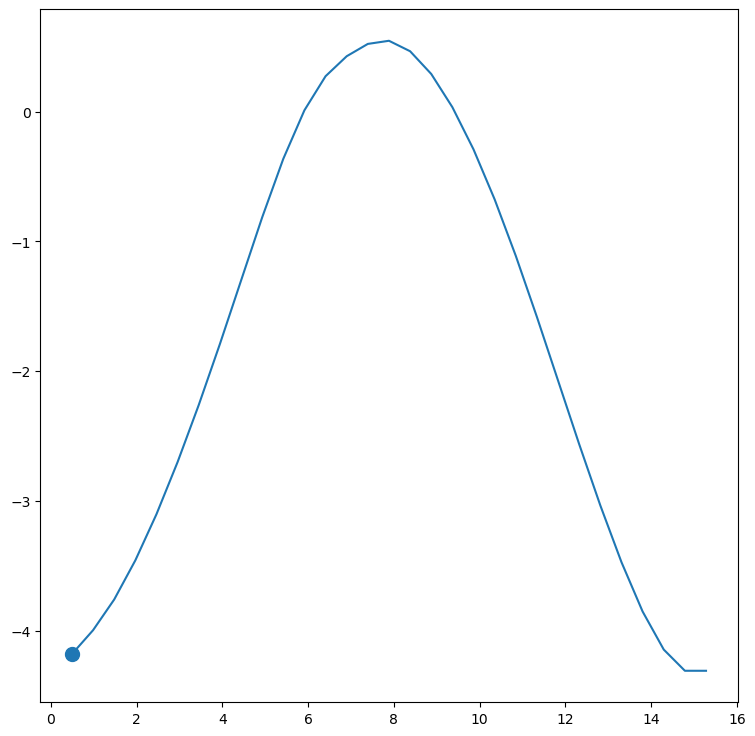

In [17]:
plt.figure(figsize=(9,9))
plt.plot(raw_data.iloc[:, 1], raw_data.iloc[:, 2])
plt.scatter(raw_data.iloc[0,1], raw_data.iloc[0,2], s = 100)

In [18]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"maps/{MAP_NAME}.png"):
    map_img_path = f"maps/{MAP_NAME}.png"
elif os.path.exists(f"maps/{MAP_NAME}.pgm"):
    map_img_path = f"maps/{MAP_NAME}.pgm"
else:
    raise Exception("Map not found!")

map_yaml_path = f"maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# calculate map parameters
orig_x = origin[0]
orig_y = origin[1]
# ??? Should be 0
orig_s = np.sin(origin[2])
orig_c = np.cos(origin[2])

# get the distance transform
transformed_data = raw_data.copy()
transformed_data -= np.array([ orig_x, orig_y,0,0])
transformed_data.iloc[:, :2] /= map_resolution

raw_map_img = np.array(Image.open(map_img_path).transpose(Image.FLIP_TOP_BOTTOM))
raw_map_img = raw_map_img.astype(np.float64)


ValueError: Unable to coerce to Series, length must be 7: given 4

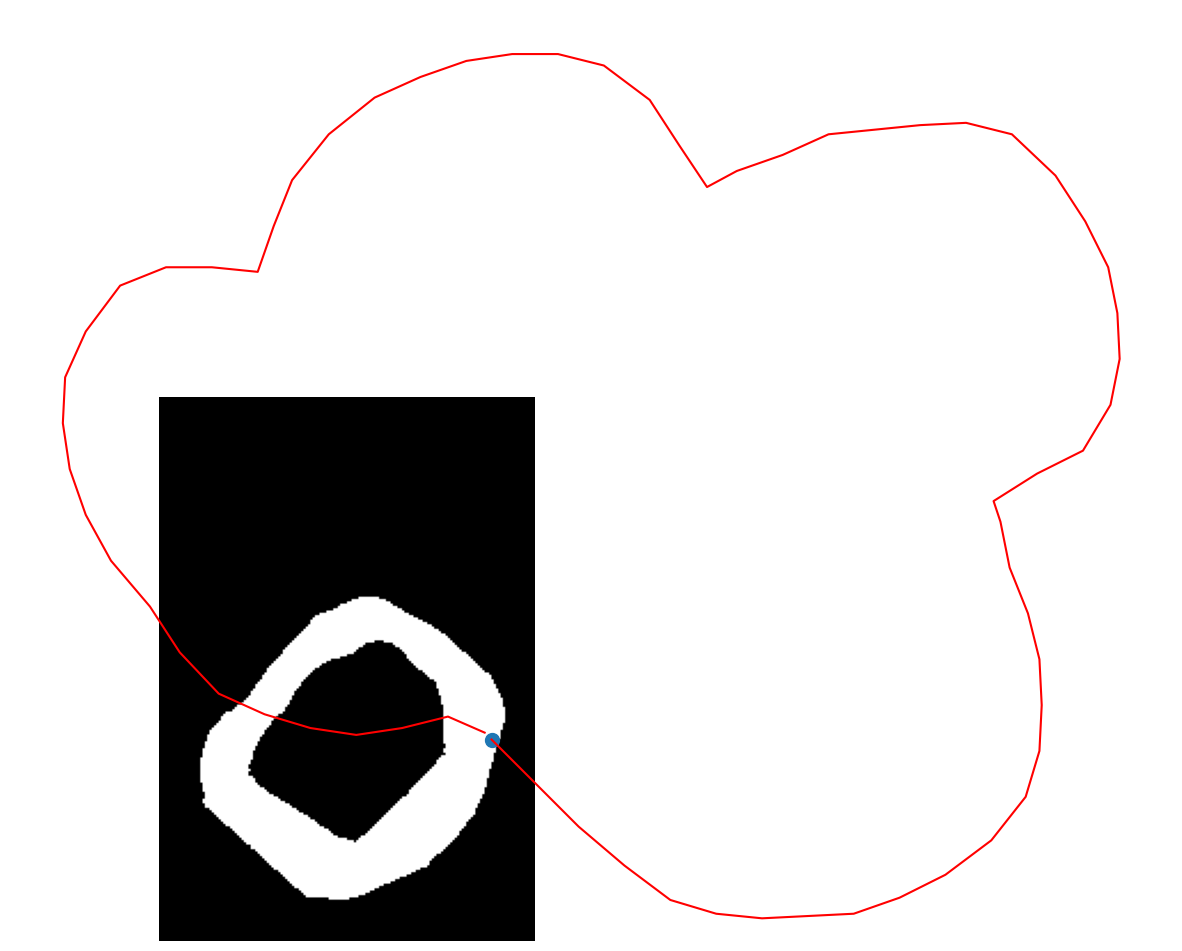

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:,0], transformed_data.iloc[:, 1], color='red')
plt.scatter(transformed_data.iloc[0,0],transformed_data.iloc[0,1],s= 100)
# Save image without the axis
plt.axis('off')
plt.savefig(f"outputs/{MAP_NAME}_raceline.png", bbox_inches='tight', pad_inches=0)

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.scatter(transformed_data.iloc[:, 1], transformed_data.iloc[:, 2], c=transformed_data.iloc[:, 5])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

plt.imshow(raw_map_img, cmap='gray', origin='lower')
plt.axis('off')

IndexError: single positional indexer is out-of-bounds

<Figure size 1500x1500 with 0 Axes>

## (OPTIONAL) Overlay on the original map

In [ ]:
ORIG_MAP = f"{MAP_NAME}_RAW"
orig_map_img = np.array(Image.open(f"maps/{ORIG_MAP}.pgm").transpose(Image.FLIP_TOP_BOTTOM))
orig_map_img = orig_map_img.astype(np.float64)
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.plot(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], color='red')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\czcha\\OneDrive\\Documents\\GitHub\\racecar_gym\\Raceline-Optimization\\maps\\addis_RAW.pgm'

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(orig_map_img, cmap='gray', origin='lower')
plt.scatter(transformed_data.iloc[:, 0], transformed_data.iloc[:, 1], c=transformed_data.iloc[:, 2])
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('velocity (m/s)')

NameError: name 'orig_map_img' is not defined

<Figure size 1500x1500 with 0 Axes>

## Visualize Velocity Profile in 3D

In [ ]:
raw_data_np = transformed_data.to_numpy()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
# Visualize Velocity Profile
scale_x = 1.0
scale_y = 1.0
scale_z = 0.3  # scale z axis such that it does not appear stretched

# create 3d plot

fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')

# recast get_proj function to use scaling factors for the axes
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1.0]))

ax.grid()
ax.set_aspect("auto")
ax.set_xlabel("east in m")
ax.set_ylabel("north in m")

# Doesn't work
# import matplotlib
# x,y = np.mgrid[0:orig_map_img.shape[0], 0:orig_map_img.shape[1]]
# ax.plot_surface(x,y,np.sin(0*x), facecolors=matplotlib.cm.ScalarMappable(cmap='gray').to_rgba(orig_map_img))

# plot velocity profile in 3D
ax.plot(raw_data_np[:, 0], raw_data_np[:, 1], raw_data_np[:, 2], color="k")
ax.set_zlabel("velocity in m/s")

# plot vertical lines visualizing acceleration and deceleration zones
ind_stepsize = 1
cur_ind = 0
no_points_traj_vdc = np.shape(raw_data_np)[0]
prev_vel = 0
curr_vel = 0

while cur_ind < no_points_traj_vdc - 1:
	curr_vel = raw_data_np[cur_ind, 2]
	x_tmp = [raw_data_np[cur_ind, 0], raw_data_np[cur_ind, 0]]
	y_tmp = [raw_data_np[cur_ind, 1], raw_data_np[cur_ind, 1]]
	z_tmp = [0.0, curr_vel]  # plot line with height depending on velocity

	# get proper color for line depending on acceleration
	if curr_vel - prev_vel > 0.0:
		col = "g"
	elif curr_vel - prev_vel < 0.0:
		col = "r"
	else:
		col = "gray"
	
	prev_vel = curr_vel

	# plot line
	ax.plot(x_tmp, y_tmp, z_tmp, color=col)

	# increment index
	cur_ind += ind_stepsize


plt.show()

ImportError: Failed to import any qt binding